In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    connection = sqlite3.connect("../data/checking-logs.sqlite")

    query_working_days = """
    SELECT
        strftime('%H', timestamp) AS hour,
        COUNT(*) AS count
    FROM checker
    WHERE uid LIKE 'user_%'
    AND CAST(strftime('%w', timestamp) AS INTEGER) BETWEEN 1 AND 5
    GROUP BY hour
    """

    df_working_days = pd.read_sql(query_working_days, connection)
    print("\ndf_working_days")
    print(df_working_days.to_string(index=False))

    query_weekends = """
    SELECT
        strftime('%H', timestamp) AS hour,
        COUNT(*)AS count
    FROM checker
    WHERE uid LIKE 'user_%'
    AND CAST(strftime('%w', timestamp) AS INTEGER) IN (0, 6)
    GROUP BY hour
    """

    df_weekend_days = pd.read_sql(query_weekends, connection)
    print("\ndf_weekend_days")
    print(df_weekend_days.to_string(index=False))

except FileNotFoundError as e:
    print("File not found")
    raise e



df_working_days
hour  count
  00      6
  03      2
  05     15
  06      3
  07     31
  08     37
  09     30
  10    132
  11     88
  12     79
  13     73
  14    122
  15    141
  16    170
  17    192
  18    167
  19    214
  20    183
  21    292
  22     45
  23     15

df_weekend_days
hour  count
  00      6
  01      6
  03      1
  05      2
  07     16
  08     28
  09     22
  10     28
  11    118
  12     57
  13    108
  14     87
  15    114
  16     74
  17     50
  18     68
  19    105
  20    117
  21     72
  22     59
  23     32


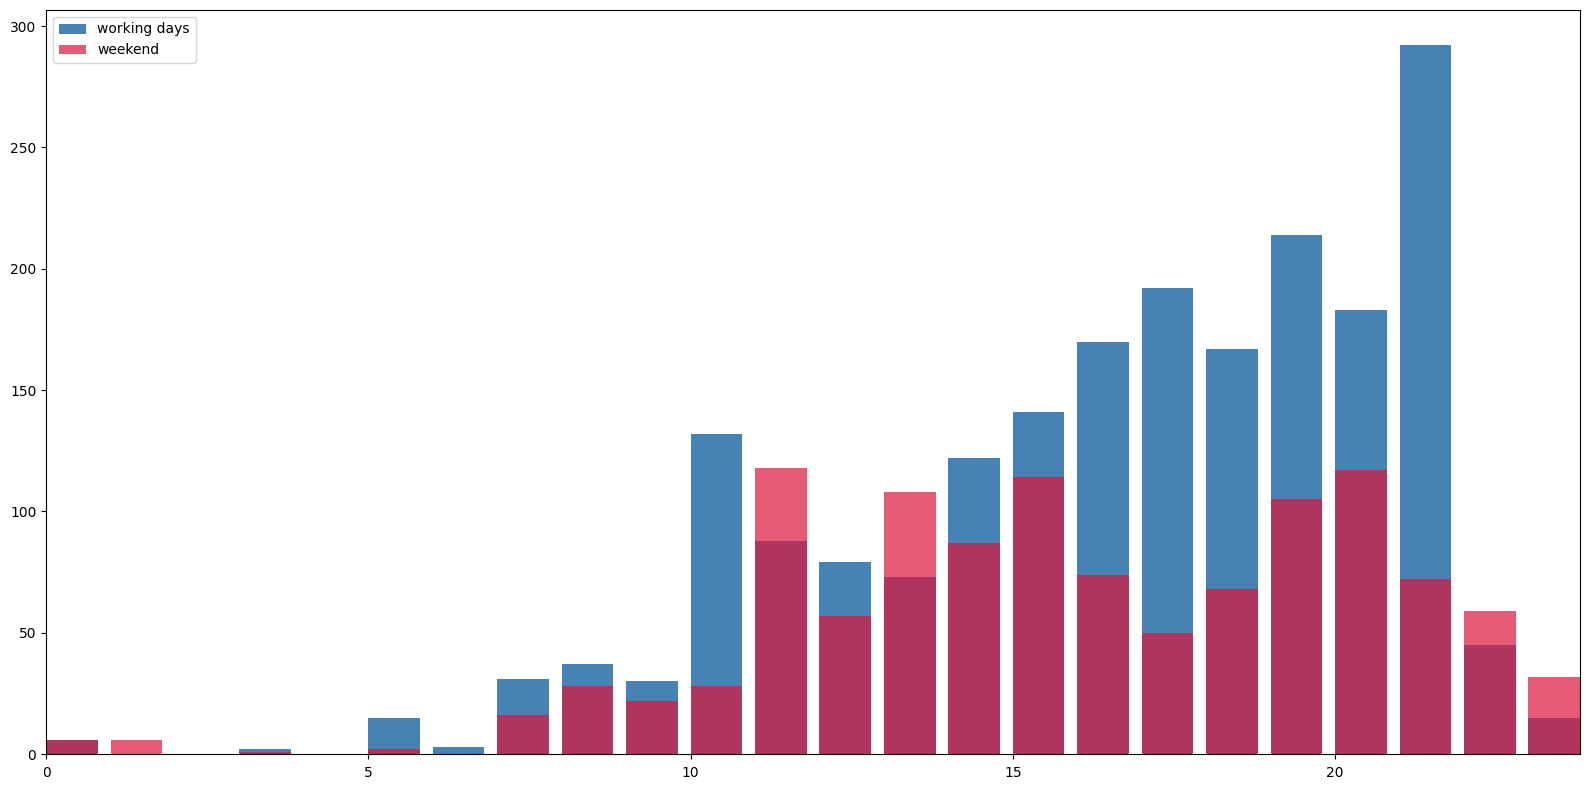

In [3]:
fig, ax = plt.subplots(figsize=(16, 8))
colors = ('#4682B4', '#DC143C')

# Преобразуем час в числовой формат
df_working_days['hour_num'] = df_working_days['hour'].astype(int)
# print(df_working_days.to_string(index=False))
df_weekend_days['hour_num'] = df_weekend_days['hour'].astype(int)

# Полупрозрачные столбцы (якорим по левой границе)
bar1 = ax.bar(
    df_working_days['hour_num'],
    df_working_days['count'],
    color=colors[0],
    width=0.8,
    align='edge'
)
bar2 = ax.bar(
    df_weekend_days['hour_num'],
    df_weekend_days['count'],
    color=colors[1],
    alpha=0.7,
    width=0.8,
    align='edge'
)

# Настройка оси x
ax.tick_params(axis='x', which='major', labelsize=10, pad=5)

# тики только на 0, 5, 10, 15, 20
ax.set_xticks(range(0, 25, 5))

# Убираем отступы matplotlib по краям
ax.margins(x=0)

ax.legend([bar1, bar2], ['working days', 'weekend'], loc='upper left')

plt.tight_layout()
plt.show()


In [4]:
connection.close()

**Вопрос**: Бывают ли часы, когда общее количество коммитов в выходные дни было выше, чем в рабочие дни? <br> **Ответ**: Да, например: c 11 до 12, с 13 до 14, с 22 до 23 и с 23 до полуночи
